# EDA

In [34]:
# import library
import numpy as np
import pandas as pd
import mlcrate as mlc
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [10]:
print('Train set')
train = pd.read_csv('./input/train.csv', nrows=10000)
train.head()


Train set


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


In [11]:
print('Test set')
test = pd.read_csv('./input/test.csv', nrows=10000)
test.head()

Test set


,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


Train: 各変数のヒストグラムと分布
Count of uniques: 
[39611, 214, 298, 160, 154]


C:\Users\osk\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


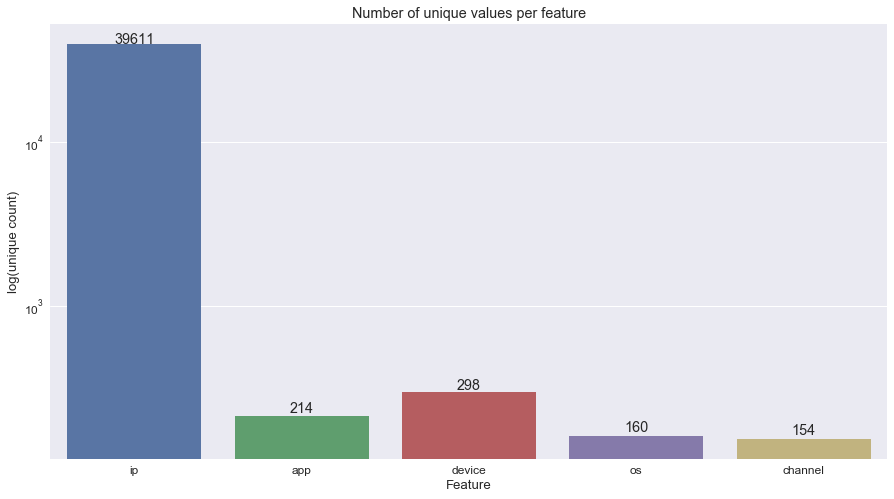

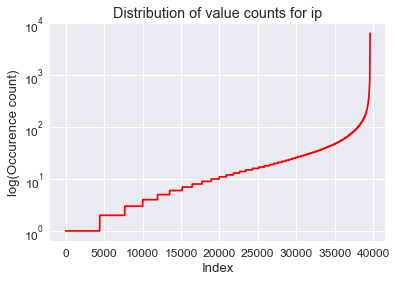

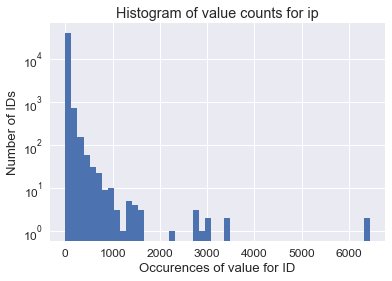

Variable 'ip': | Unique values: 39611 | Count of most common: 6437 | Count of least common: 1 | count>10: 49.56% | count>100: 3.98% | count>1000: 0.07%


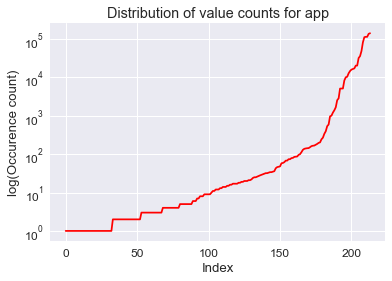

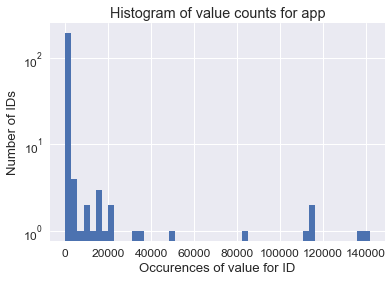

Variable 'app': | Unique values: 214 | Count of most common: 141851 | Count of least common: 1 | count>10: 51.87% | count>100: 22.9% | count>1000: 13.08%


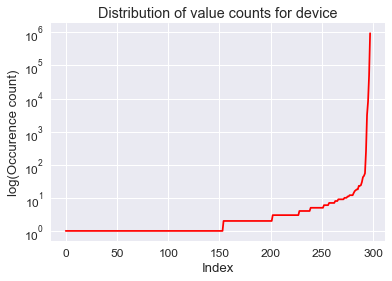

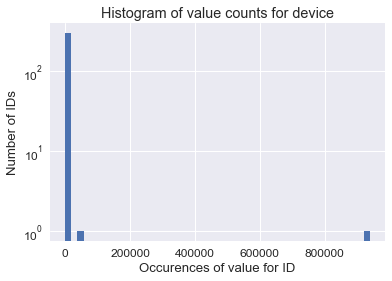

Variable 'device': | Unique values: 298 | Count of most common: 938053 | Count of least common: 1 | count>10: 7.72% | count>100: 1.68% | count>1000: 1.34%


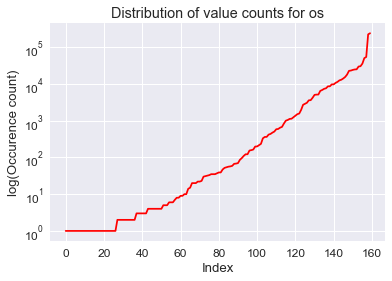

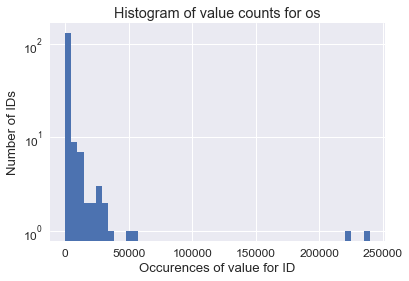

Variable 'os': | Unique values: 160 | Count of most common: 239642 | Count of least common: 1 | count>10: 60.0% | count>100: 41.88% | count>1000: 28.12%


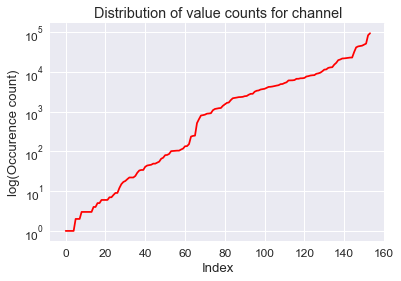

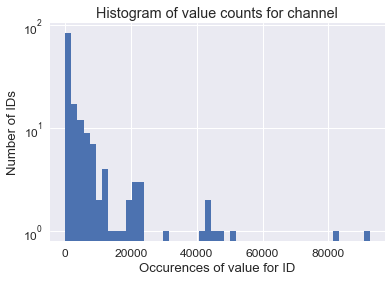

Variable 'channel': | Unique values: 154 | Count of most common: 92534 | Count of least common: 1 | count>10: 82.47% | count>100: 65.58% | count>1000: 51.95%


In [31]:
print('Train: 各変数のヒストグラムと分布')
train = pd.read_csv('./input/train.csv', nrows=1000000)
cols = ('ip', 'app', 'device', 'os', 'channel')

plt.figure(figsize=(15, 8))
uniques = [len(train[col].unique()) for col in cols]
print('Count of uniques: ')
print(uniques)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center")

for col, uniq in zip(cols, uniques):
    counts = train[col].value_counts()

    sorted_counts = np.sort(counts.values)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    line, = ax.plot(sorted_counts, color='red')
    ax.set_yscale('log')
    plt.title("Distribution of value counts for {}".format(col))
    plt.ylabel('log(Occurence count)')
    plt.xlabel('Index')
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(sorted_counts, bins=50)
    ax.set_yscale('log', nonposy='clip')
    plt.title("Histogram of value counts for {}".format(col))
    plt.ylabel('Number of IDs')
    plt.xlabel('Occurences of value for ID')
    plt.show()
    
    max_count = np.max(counts)
    min_count = np.min(counts)
    gt = [10, 100, 1000]
    prop_gt = []
    for value in gt:
        prop_gt.append(round((counts > value).mean()*100, 2))
    print("Variable '{}': | Unique values: {} | Count of most common: {} | Count of least common: {} | count>10: {}% | count>100: {}% | count>1000: {}%".format(col, uniq, max_count, min_count, *prop_gt))

In [26]:
print('Train: 基本的な統計量')
train = pd.read_csv('./input/train.csv', nrows=1000000)
train.describe()

,ip,app,device,os,channel,is_attributed
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,86993.581653,12.316655,26.141368,23.067662,241.523634,0.001693
std,55529.023541,16.216890,273.537010,55.323313,122.713405,0.041111
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42297.000000,3.000000,1.000000,13.000000,134.000000,0.000000
50%,81725.000000,12.000000,1.000000,18.000000,232.000000,0.000000
75%,120440.000000,15.000000,1.000000,19.000000,280.000000,0.000000
max,212773.000000,645.000000,3379.000000,715.000000,498.000000,1.000000


Train: Heatmap


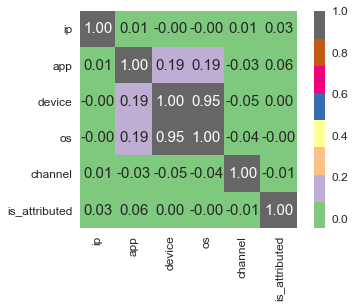

In [30]:
print('Train: Heatmap')
train = pd.read_csv('./input/train.csv', nrows=1000000)
sns.heatmap(train.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15},cmap='Accent')